# imports

In [ ]:
import os
path = os.getcwd()

if path[1:5] == "Home":
    %run /Home/siv30/wad005/master/GRB/src/convert_erg.ipynb
    %run /Home/siv30/wad005/master/GRB/src/T0.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/convert_erg.ipynb
    %run /Users/andreas/phys/master/GRB/src/T0.ipynb

In [4]:
get_coefs(datetime.fromisoformat('2019-06-06T01:55:07.318605'))

{'dau_1_det_1': {'a': 0.005194, 'b': 7.6191, 'c': 70.41104},
 'dau_1_det_2': {'a': -0.001867, 'b': 20.56, 'c': 4.6154},
 'dau_1_det_3': {'a': 0.003327, 'b': 9.59881, 'c': 37.9718},
 'dau_2_det_1': {'a': 0.006888, 'b': 5.9081, 'c': 98.48185},
 'dau_2_det_2': {'a': 0.004422, 'b': 11.2623, 'c': 34.2532},
 'dau_2_det_3': {'a': 0.00527, 'b': 8.73038, 'c': 60.55223},
 'dau_3_det_1': {'a': -0.002302, 'b': 22.4646, 'c': -8.372421},
 'dau_3_det_2': {'a': -0.004646, 'b': 26.7193, 'c': -33.44253},
 'dau_3_det_3': {'a': -0.002777, 'b': 23.3117, 'c': 0.99864},
 'dau_4_det_1': {'a': 0.003539, 'b': 11.0971, 'c': 50.03874},
 'dau_4_det_2': {'a': 0.003341, 'b': 12.8369, 'c': 22.60945},
 'dau_4_det_3': {'a': 0.002526, 'b': 12.3026, 'c': 20.5739}}

In [3]:
T0s = df_time['T0'].to_numpy()
T0s

array(['2018-07-20T14:21:47.389942', '2018-12-22T20:11:36.576228',
       '2019-02-06T03:49:28.525262', '2019-03-05T13:05:19.816318',
       '2019-06-06T01:55:07.318605', '2020-04-15T08:48:05.528427',
       '2020-05-21T12:16:39.818925', '2020-07-16T22:57:40.634534',
       '2020-12-27T15:14:06.853667', '2021-04-24T08:01:54.997654',
       '2021-06-19T23:59:24.915550', '2021-12-11T13:10:01.323743'],
      dtype=object)

In [8]:
bad_T0s = ['2018-12-22T20:11:36.576228', '2019-02-06T03:49:28.525262', '2019-03-05T13:05:19.816318', '2020-05-21T12:16:39.818925']
good_T0s = ['2019-06-06T01:55:07.318605', '2020-07-16T22:57:40.634534', '2020-12-27T15:14:06.853667', '2021-06-19T23:59:24.915550', '2021-12-11T13:10:01.323743']

In [26]:
bad_coefs,good_coefs = {},{}
for T in T0s:
    dt = datetime.fromisoformat(T)
    if T in good_T0s:
        good_coefs['GRB'+datetime.strftime(dt,'%y%m%d')] = get_coefs(dt)
    elif T in bad_T0s:
        bad_coefs['GRB'+datetime.strftime(dt,'%y%m%d')] = get_coefs(dt)
    else:
        continue

In [27]:
import pandas as pd
df_good_coefs = pd.DataFrame(good_coefs)
df_bad_coefs = pd.DataFrame(bad_coefs)

In [29]:
print(df_bad_coefs.shape)

(12, 4)


In [252]:
# Create a dataframe to store the statistics
statistics_df = pd.DataFrame(columns=['DAU', 'DET', 'Variable', 'Mean', 'Min', 'Max'])

for i in range(1,5):
    for j in range(1,4):
        a,b,c = [],[],[]
        for k, v in df_coef.items():
            adr = f'dau_{i}_det_{j}'

            a.append(v[adr]['a'])
            b.append(v[adr]['b'])
            c.append(v[adr]['c'])
        
        a_stats = pd.DataFrame(a,columns=['a']).describe()
        b_stats = pd.DataFrame(b,columns=['b']).describe()
        c_stats = pd.DataFrame(c,columns=['c']).describe()
        
        new_row_a = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'a', 'Mean': a_stats.loc['mean']['a'], 'Min': a_stats.loc['min']['a'], 'Max': a_stats.loc['max']['a'], 'std': a_stats.loc['std']['a']}, index=[0])
        new_row_b = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'b', 'Mean': b_stats.loc['mean']['b'], 'Min': b_stats.loc['min']['b'], 'Max': b_stats.loc['max']['b'], 'std': b_stats.loc['std']['b']}, index=[0])
        new_row_c = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'c', 'Mean': c_stats.loc['mean']['c'], 'Min': c_stats.loc['min']['c'], 'Max': c_stats.loc['max']['c'], 'std': c_stats.loc['std']['c']}, index=[0])

        statistics_df = pd.concat([statistics_df, new_row_a], ignore_index=True)
        statistics_df = pd.concat([statistics_df, new_row_b], ignore_index=True)
        statistics_df = pd.concat([statistics_df, new_row_c], ignore_index=True)

statistics_df = statistics_df.assign(dau_det = statistics_df['DAU'].astype(str) + '_' + statistics_df['DET'].astype(str))

,DAU,DET,Variable,Mean,Min,Max,std,dau_det
0,1,1,a,0.005133,0.004837,0.005403,0.000172,1_1
1,1,1,b,8.139442,7.612500,8.810700,0.347463,1_1
2,1,1,c,63.346996,46.424470,81.191600,10.448827,1_1
3,1,2,a,-0.001778,-0.002947,-0.000229,0.000958,1_2
4,1,2,b,20.425150,17.665100,22.522300,1.725153,1_2


In [73]:
# Create dataframes to store the statistics
statistics_df_good = pd.DataFrame(columns=['DAU', 'DET', 'Variable', 'Mean', 'Min', 'Max','std'])
statistics_df_bad = pd.DataFrame(columns=['DAU', 'DET', 'Variable', 'Mean', 'Min', 'Max','std'])

# Iterate over the good dataframe
for i in range(1,5):
    for j in range(1,4):
        a,b,c = [],[],[]
        for k, v in df_good_coefs.items():
            adr = f'dau_{i}_det_{j}'

            a.append(v[adr]['a'])
            b.append(v[adr]['b'])
            c.append(v[adr]['c'])
        
        a_stats = pd.DataFrame(a,columns=['a']).describe()
        b_stats = pd.DataFrame(b,columns=['b']).describe()
        c_stats = pd.DataFrame(c,columns=['c']).describe()
        
        new_row_a = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'a', 'Mean': a_stats.loc['mean']['a'], 'Min': a_stats.loc['min']['a'], 'Max': a_stats.loc['max']['a'], 'std': a_stats.loc['std']['a']}, index=[0])
        new_row_b = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'b', 'Mean': b_stats.loc['mean']['b'], 'Min': b_stats.loc['min']['b'], 'Max': b_stats.loc['max']['b'], 'std': b_stats.loc['std']['b']}, index=[0])
        new_row_c = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'c', 'Mean': c_stats.loc['mean']['c'], 'Min': c_stats.loc['min']['c'], 'Max': c_stats.loc['max']['c'], 'std': c_stats.loc['std']['c']}, index=[0])

        statistics_df_good = pd.concat([statistics_df_good, new_row_a], ignore_index=True)
        statistics_df_good = pd.concat([statistics_df_good, new_row_b], ignore_index=True)
        statistics_df_good = pd.concat([statistics_df_good, new_row_c], ignore_index=True)
        
statistics_df_good = statistics_df_good.assign(dau_det = statistics_df_good['DAU'].astype(str) + '_' + statistics_df_good['DET'].astype(str))


# Iterate over the bad dataframe
for i in range(1,5):
    for j in range(1,4):
        a,b,c = [],[],[]
        for k, v in df_bad_coefs.items():
            adr = f'dau_{i}_det_{j}'

            a.append(v[adr]['a'])
            b.append(v[adr]['b'])
            c.append(v[adr]['c'])
        
        a_stats = pd.DataFrame(a,columns=['a']).describe()
        b_stats = pd.DataFrame(b,columns=['b']).describe()
        c_stats = pd.DataFrame(c,columns=['c']).describe()
        
        new_row_a = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'a', 'Mean': a_stats.loc['mean']['a'], 'Min': a_stats.loc['min']['a'], 'Max': a_stats.loc['max']['a'], 'std': a_stats.loc['std']['a']}, index=[0])
        new_row_b = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'b', 'Mean': b_stats.loc['mean']['b'], 'Min': b_stats.loc['min']['b'], 'Max': b_stats.loc['max']['b'], 'std': b_stats.loc['std']['b']}, index=[0])
        new_row_c = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'c', 'Mean': c_stats.loc['mean']['c'], 'Min': c_stats.loc['min']['c'], 'Max': c_stats.loc['max']['c'], 'std': c_stats.loc['std']['c']}, index=[0])

        statistics_df_bad = pd.concat([statistics_df_bad, new_row_a], ignore_index=True)
        statistics_df_bad = pd.concat([statistics_df_bad, new_row_b], ignore_index=True)
        statistics_df_bad = pd.concat([statistics_df_bad, new_row_c], ignore_index=True)
        
statistics_df_bad = statistics_df_bad.assign(dau_det = statistics_df_bad['DAU'].astype(str) + '_' + statistics_df_bad['DET'].astype(str))

/tmp/ipykernel_721447/2273820341.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=statistics_df_good['dau_det'].unique(),rotation=45)


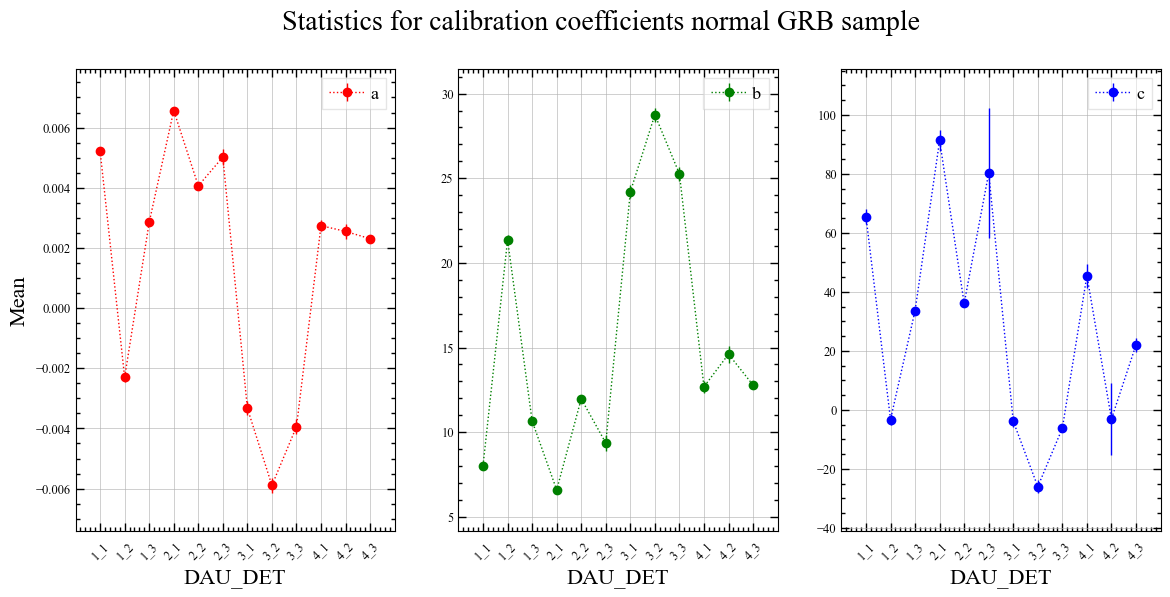

In [65]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(14, 6))

colors = {'a':'red', 'b':'green', 'c':'blue'}
for variable in statistics_df_good['Variable'].unique():
    data = statistics_df_good[statistics_df_good['Variable'] == variable]
    x = data['dau_det']
    y = data['Mean']
    yerr = data['std']/np.sqrt(len(T0s)) # SEM (sigma / sqrt(12) )
    if variable == 'a':
        ax1.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')
    elif variable == 'b':
        ax2.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')
    elif variable == 'c':
        ax3.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('DAU_DET')
ax1.set_ylabel('Mean')
ax1.set_xlim(left=-1, right=12)
ax1.tick_params(labelsize=9)
ax1.grid()
ax2.set_xlabel('DAU_DET')
ax2.set_xlim(left=-1, right=12)
ax2.tick_params(labelsize=9)
ax2.grid()
ax3.set_xlabel('DAU_DET')
ax3.set_xlim(left=-1, right=12)
ax3.tick_params(labelsize=9)
ax3.grid()

for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(labels=statistics_df_good['dau_det'].unique(),rotation=45)
    
plt.suptitle('Statistics for calibration coefficients normal GRB sample',fontsize=20)
#plt.savefig('coef_statistics_normal.png',dpi=350)
plt.show()

/tmp/ipykernel_721447/3932720462.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=statistics_df_bad['dau_det'].unique(),rotation=45)


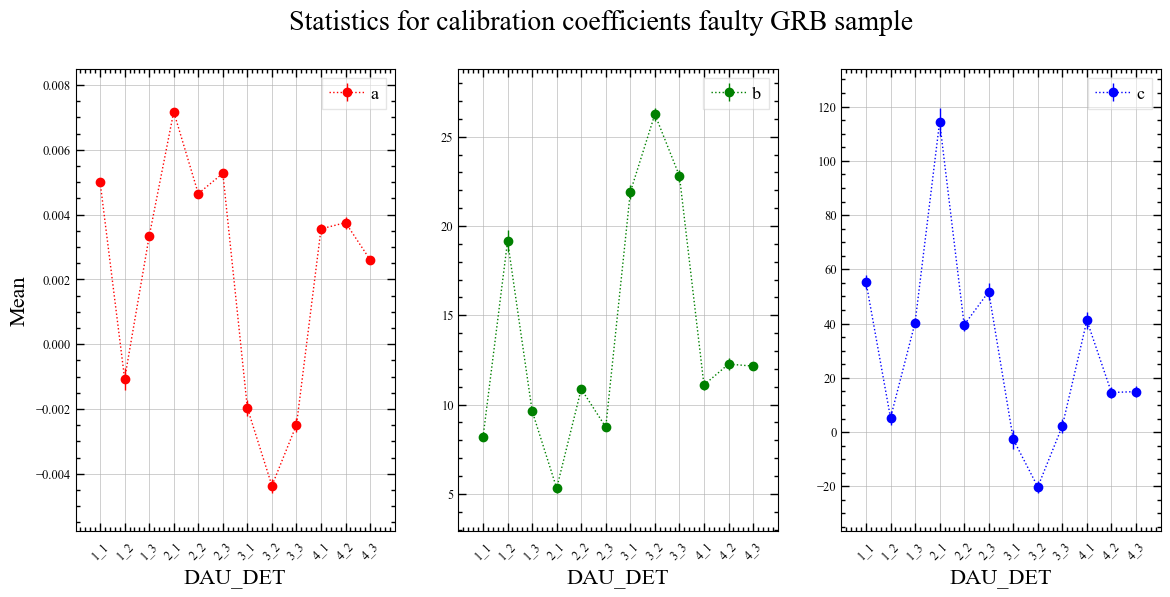

In [66]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(14, 6))

colors = {'a':'red', 'b':'green', 'c':'blue'}
for variable in statistics_df_bad['Variable'].unique():
    data = statistics_df_bad[statistics_df_bad['Variable'] == variable]
    x = data['dau_det']
    y = data['Mean']
    yerr = data['std']/np.sqrt(len(T0s)) # SEM (sigma / sqrt(12) )
    if variable == 'a':
        ax1.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')
    elif variable == 'b':
        ax2.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')
    elif variable == 'c':
        ax3.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('DAU_DET')
ax1.set_ylabel('Mean')
ax1.set_xlim(left=-1, right=12)
ax1.tick_params(labelsize=9)
ax1.grid()
ax2.set_xlabel('DAU_DET')
ax2.set_xlim(left=-1, right=12)
ax2.tick_params(labelsize=9)
ax2.grid()
ax3.set_xlabel('DAU_DET')
ax3.set_xlim(left=-1, right=12)
ax3.tick_params(labelsize=9)
ax3.grid()

for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(labels=statistics_df_bad['dau_det'].unique(),rotation=45)
    
plt.suptitle('Statistics for calibration coefficients faulty GRB sample',fontsize=20)
#plt.savefig('coef_statistics_faulty.png',dpi=350)
plt.show()

In [41]:
#export


#statistics_df.to_csv("calibration_coef_statistics")

In [80]:
# add a new column indicating whether the event is good or bad
statistics_df_good['Event'] = 'good'
statistics_df_bad['Event'] = 'bad'

# concatenate the two dataframes
statistics_df = pd.concat([statistics_df_good, statistics_df_bad], ignore_index=True)
statistics_df[['Mean', 'Min', 'Max', 'std']] = statistics_df[['Mean', 'Min', 'Max', 'std']].apply(pd.to_numeric, errors='coerce')
correlation_matrix = statistics_df.corr('pearson')


#correlation_matrix = statistics_df[['Mean', 'Min', 'Max', 'std', 'Event']].corrwith(statistics_df['Event'], method='pearson')




In [81]:
correlation_matrix

,Mean,Min,Max,std
Mean,1.000000,0.884541,0.901982,0.463042
Min,0.884541,1.000000,0.684832,0.065987
Max,0.901982,0.684832,1.000000,0.771936
std,0.463042,0.065987,0.771936,1.000000


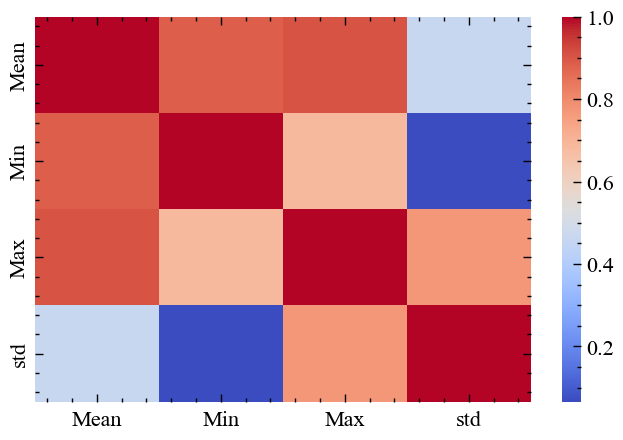

In [82]:
import seaborn as sns

# plot the heatmap
sns.heatmap(correlation_matrix, 
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cmap='coolwarm')
plt.show()

In [137]:
# do it in a loop, print out the mean,min and max for the coefs in each address
a_mean,b_mean,c_mean = {},{},{}

for i in range(1,5):
    for j in range(1,4):
        a,b,c = [],[],[]
        for k, v in df_coef.items():
            adr = f'dau_{i}_det_{j}'

            a.append(v[adr]['a'])
            b.append(v[adr]['b'])
            c.append(v[adr]['c'])
            
        a_mean[adr],b_mean,c_mean = round(np.mean(a),6),round(np.mean(b),6),round(np.mean(c),6)
        
        print(adr)
        print(f'a >> mean: {round(np.mean(a),4)} | min: {round(np.min(a),4)} | max: {round(np.max(a),4)}')
        print(f'b >> mean: {round(np.mean(b),4)} | min: {round(np.min(b),4)} | max: {round(np.max(b),4)}')
        print(f'c >> mean: {round(np.mean(c),4)} | min: {round(np.min(c),4)} | max: {round(np.max(c),4)}')

dau_1_det_1
a >> mean: 0.0051 | min: 0.0048 | max: 0.0054
b >> mean: 8.1394 | min: 7.6125 | max: 8.8107
c >> mean: 63.347 | min: 46.4245 | max: 81.1916
dau_1_det_2
a >> mean: -0.0018 | min: -0.0029 | max: -0.0002
b >> mean: 20.4252 | min: 17.6651 | max: 22.5223
c >> mean: 0.4804 | min: -9.5609 | max: 16.5279
dau_1_det_3
a >> mean: 0.0031 | min: 0.0025 | max: 0.0038
b >> mean: 10.1586 | min: 8.5685 | max: 11.4011
c >> mean: 36.7934 | min: 26.4196 | max: 48.8509
dau_2_det_1
a >> mean: 0.0068 | min: 0.0061 | max: 0.0075
b >> mean: 6.0451 | min: 4.721 | max: 7.4788
c >> mean: 100.1795 | min: 69.692 | max: 128.4756
dau_2_det_2
a >> mean: 0.0044 | min: 0.0038 | max: 0.0053
b >> mean: 11.3886 | min: 9.5263 | max: 12.5003
c >> mean: 39.0338 | min: 28.982 | max: 65.2448
dau_2_det_3
a >> mean: 0.005 | min: 0.0042 | max: 0.0065
b >> mean: 9.3559 | min: 6.8634 | max: 10.8737
c >> mean: 61.3789 | min: 35.8381 | max: 216.209
dau_3_det_1
a >> mean: -0.0026 | min: -0.0044 | max: -0.0009
b >> mean: 23.

    After reviewing the above data, I have identified some inconsistencies. Specifically, the c value in the dau1det2 set has a min of -9.5609 and a max of 16.5279, suggesting that the range of values is wider than the other sets. Additionally, the c value in the dau4det2 set has a min of -77.9592 and a max of 24.6056, indicating an even wider range of values. This could indicate a potential issue with the calibration coefs.

In [ ]:
# c value in dau_1_det_2 has a min of -9.5609 (GRB200716) and a max of 16.5279 (GRB190305) >> mean: 0.4804
# c value in the dau_4_det_2 set has a min of -77.9592 (GRB211211) and a max of 24.6056 (GRB190305) >> mean: 2.6919

    After reviewing the data, it appears that dau2det2 and dau4det2 have inconsistencies. In dau2det2, the c value has a min and max of -9.5609 and 16.5279 respectively, while in dau4det2, the c value has a min and max of -77.9592 and 24.6056 respectively. This is a significant discrepancy, as the max and min values in dau2det2 are much narrower than in dau4det2. Furthermore, in dau4det2, the mean value for c is 2.6919, indicating that the majority of the data points are relatively low, while in dau2det2 the mean value for c is much higher at 39.0338.